In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
# File to Load 
citydata = pd.read_csv("cityData.csv")
ridedata = pd.read_csv("rideData.csv")
# Drop duplicate values
citydata = citydata.drop_duplicates('city')
# city data
citydata.head()


,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [3]:
# Read the City and Ride Data
ridedata.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,1/14/2018 10:14,13.83,5.739410e+12
1,South Michelleport,3/4/2018 18:24,30.24,2.343910e+12
2,Port Samanthamouth,2/24/2018 4:29,33.44,2.005070e+12
3,Rodneyfort,2/10/2018 23:22,23.44,5.149250e+12
4,South Jack,3/6/2018 4:28,34.58,3.908450e+12


In [4]:
# Combine the data into a single dataset
pyberdata_df = citydata.merge(ridedata, on = 'city', how = 'outer')
pyberdata_df.head()


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2/24/2018 8:40,13.93,5.628550e+12
1,Richardfort,38,Urban,2/13/2018 12:46,14.00,9.100500e+11
2,Richardfort,38,Urban,2/16/2018 13:52,17.92,8.206390e+11
3,Richardfort,38,Urban,2/1/2018 20:18,10.26,9.554940e+12
4,Richardfort,38,Urban,4/17/2018 2:26,23.00,7.200210e+11


In [5]:
# Create separate data frames based on city types
urbancity = pyberdata_df.loc[(pyberdata_df["type"] == "Urban")]
suburbancity = pyberdata_df.loc[(pyberdata_df["type"] == "Suburban")]
ruralcity = pyberdata_df.loc[(pyberdata_df["type"] == "Rural")]


In [6]:
# Total rides and Drivers for Urban cities -average
avgfare_urban = urbancity.groupby(['city'])['fare'].mean()
totalrides_urban = urbancity.groupby(['city']).count()['ride_id']
totaldrivers_urban = urbancity.groupby(['city'])['driver_count'].value_counts()


In [7]:
# Total Rides and Total Drivers for Suburban cities calculation per city -average
avgfare_suburban = suburbancity.groupby(['city'])['fare'].mean()
totalrides_suburban = suburbancity.groupby(['city']).count()['ride_id']
totaldrivers_suburban = suburbancity.groupby(['city'])['driver_count'].value_counts()


In [8]:
# Total Rides and Total Drivers for Rural cities calculation per city calculations average
avgfare_rural = ruralcity.groupby(['city'])['fare'].mean()
totalrides_rural = ruralcity.groupby(['city']).count()['ride_id']
totaldrivers_rural = ruralcity.groupby(['city'])['driver_count'].value_counts()


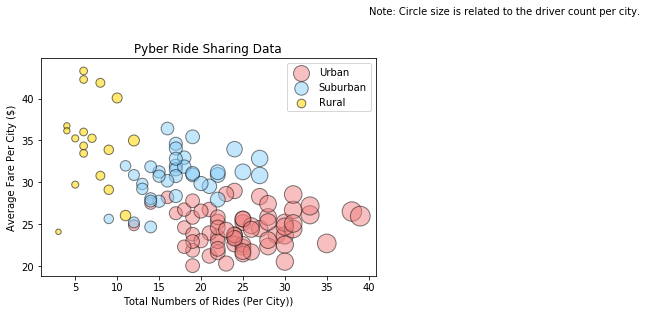

In [14]:
# Create scatter plots for Urban, Suburban and Rural cities
plt.scatter(totalrides_urban, avgfare_urban,s=totaldrivers_urban*10,
            marker ='o', facecolors ="lightcoral", edgecolors='black',alpha = 0.5, label="Urban")

plt.scatter(totalrides_suburban, avgfare_suburban,s=totaldrivers_suburban*10,
            marker ='o', facecolors ="lightskyblue", edgecolors='black',alpha = 0.5, label="Suburban")

plt.scatter(totalrides_rural, avgfare_rural,s=totaldrivers_rural*10,
            marker ='o', facecolors ="gold", edgecolors='black',alpha = 0.55, label="Rural")


# Chart title
plt.title("Pyber Ride Sharing Data")
# x label
plt.xlabel("Total Numbers of Rides (Per City))")
# y label
plt.ylabel("Average Fare Per City ($)")
# legend 
plt.legend(loc='upper right')

plt.text(40, 50,"Note: Circle size is related to the driver count per city.")

# Save an image of the chart and print to screen
plt.savefig("Pyber Ride Sharing.png")
plt.show()


In [10]:
# Total Fare by City Type
total_fare = pyberdata_df.groupby(['type'])['fare'].sum()

# Labels for the sections of our pie chart
labels = ["Rural","Suburban","Urban" ]


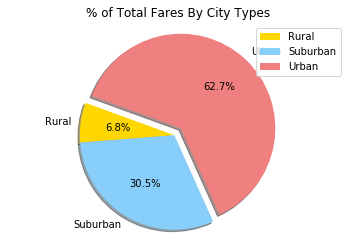

In [11]:
# The colors of each section of the pie chart
colors = ["gold","lightskyblue","lightcoral"]

explode = (0, 0, 0.1)
plt.title("% of Total Fares By City Types")

plt.pie(total_fare, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%",shadow=True, startangle=160)
plt.axis("equal")

#Add the legend
plt.legend(loc = "upper right")

plt.savefig("% of Total Fares By City Types.png")
plt.show()


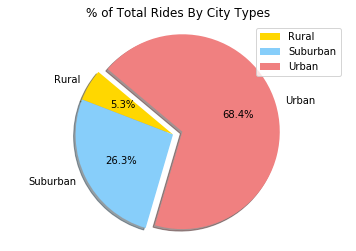

In [12]:
# Calculate Total Fare by City Type
total_rides = pyberdata_df.groupby(['type'])['ride_id'].count()

# Labels for the sections of pie chart
labels = ["Rural","Suburban","Urban" ]

# The colors of each section of pie chart
colors = ["gold","lightskyblue","lightcoral"]

explode = (0, 0, 0.1)

plt.title("% of Total Rides By City Types")
plt.pie(total_rides, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

#Add the legend
plt.legend(loc = "upper right")

plt.axis("equal")
plt.savefig("% of Total Rides By City Types.png")
plt.show()


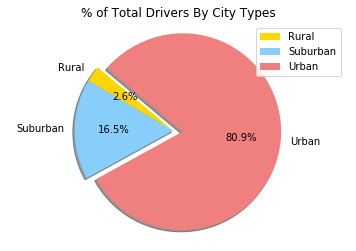

In [13]:
# Calculate Total Drivers by City Type
total_drivers = citydata.groupby(['type'])['driver_count'].sum()

# Labels for the sections of pie chart
labels = ["Rural","Suburban","Urban" ]

# The colors of each section of pie chart
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)

plt.title("% of Total Drivers By City Types")
plt.pie(total_drivers, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

#Add the legend
plt.legend(loc = "upper right")

plt.axis("equal")

plt.savefig("% of Total Drivers By City Types.png")
plt.show()
